In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as sp

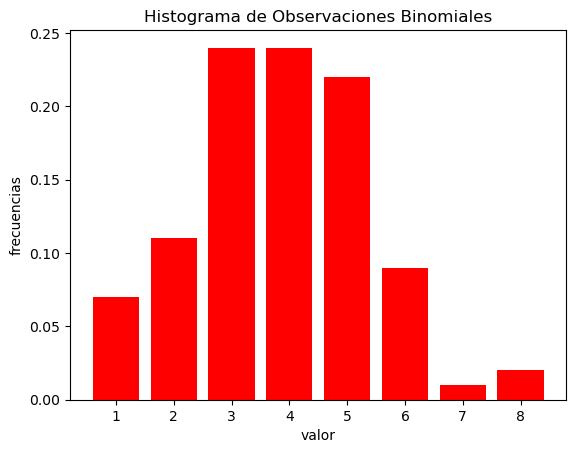

In [2]:
#Simulamos la distribucion binomial calculando la frecuencia.
n=10 #numero de experimentos
p=0.4 #la probabilidad de exito
observaciones=np.random.binomial(n=n, p=p, size=100) #simula las 100 observaciones de la variable aleatoria binomial.
valor,cuentas=np.unique(observaciones, return_counts=True)
frecuencias=cuentas/(np.sum(cuentas))
plt.bar(valor,frecuencias, facecolor='red')
plt.xlabel('valor')
plt.ylabel('frecuencias')
plt.title('Histograma de Observaciones Binomiales')
plt.savefig('histograma_de_observaciones_binomiales.pdf', dpi=300, bbox_inches='tight')

In [3]:
#Definimos el chi-cuadrado
def chi2(o,E):
    test=np.sum((o-E)**2/E)
    return(test)

El valor de chi-cuadrado es: 7.307216372505515


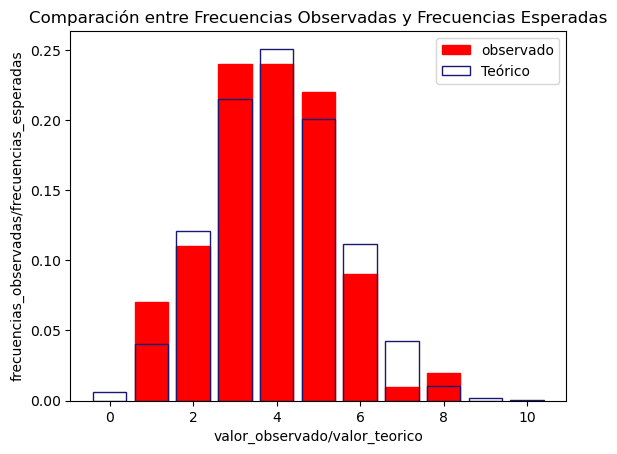

In [4]:
frecuencias_observadas_completas = np.zeros(n + 1) #Esto me crea un array de observaciones completo, completando con 0 donde no hubo observaciones
frecuencias_observadas_completas[valor] = cuentas #Con esto tanto cuantas como frecuencias esperadas tienen la misma cantidad de elementos.
#Calculo el chi-cuadrado a partir de los datos simulados y del modelo.
valores_teoricos = np.arange(0,n+1) #array que contenga todos los posibles resultados de la distribución binomial B(n,p)
N=100 #Numero de observaciones simuladas
frecuencia_esperada= N* sp.binom.pmf(valores_teoricos,n,p) #Al multiplicar por el tamaño de la muestra, se obtienen las frecuencias esperadas absolutas
# Si calculo, a continuacion y finalmente, el valor de chi-cuadrado
chi2_valor = chi2(frecuencias_observadas_completas, frecuencia_esperada)
print('El valor de chi-cuadrado es:', chi2_valor)
#Grafiquemos y comparemos las frecuencias obtenidas.
plt.bar(valor, frecuencias, edgecolor='red', facecolor='red', label='observado')#Ploteamos en un grafico de barras los observados.
plt.bar(valores_teoricos, frecuencia_esperada / 100, facecolor='none', edgecolor='midnightblue', label='Teórico') #divido por 100 devido que la frecuencia esperada a partir de 100 observaciones estan normalizada, ademas ambos graficos, deben compararse en la misma escala.
plt.xlabel('valor_observado/valor_teorico')
plt.ylabel('frecuencias_observadas/frecuencias_esperadas')
plt.legend()
plt.title('Comparación entre Frecuencias Observadas y Frecuencias Esperadas')
plt.savefig('Comparacion_frecuencias_observadas_esperadas.pdf', dpi=300, bbox_inches='tight')
plt.show()

In [5]:


#Primero calculamos los grados de libertad
gl=len(valores_teoricos)-1-1
print(gl)

valor_p = 1 - sp.chi2.cdf(chi2_valor, gl)
print('El valor-p es:',valor_p)

# Prueba de hipotesis con el valor-p
alpha = 0.05  # Nivel de significancia
if valor_p < alpha:
    print("Se Rechaza la hipótesis nula: las frecuencias observadasno siguen el modelo binomial.")
else:
    print("No se rechaza la hipótesis nula: las frecuencias observadas están en acuerdo con el modelo binomial.")



9
El valor-p es: 0.6051672452657727
No se rechaza la hipótesis nula: las frecuencias observadas están en acuerdo con el modelo binomial.


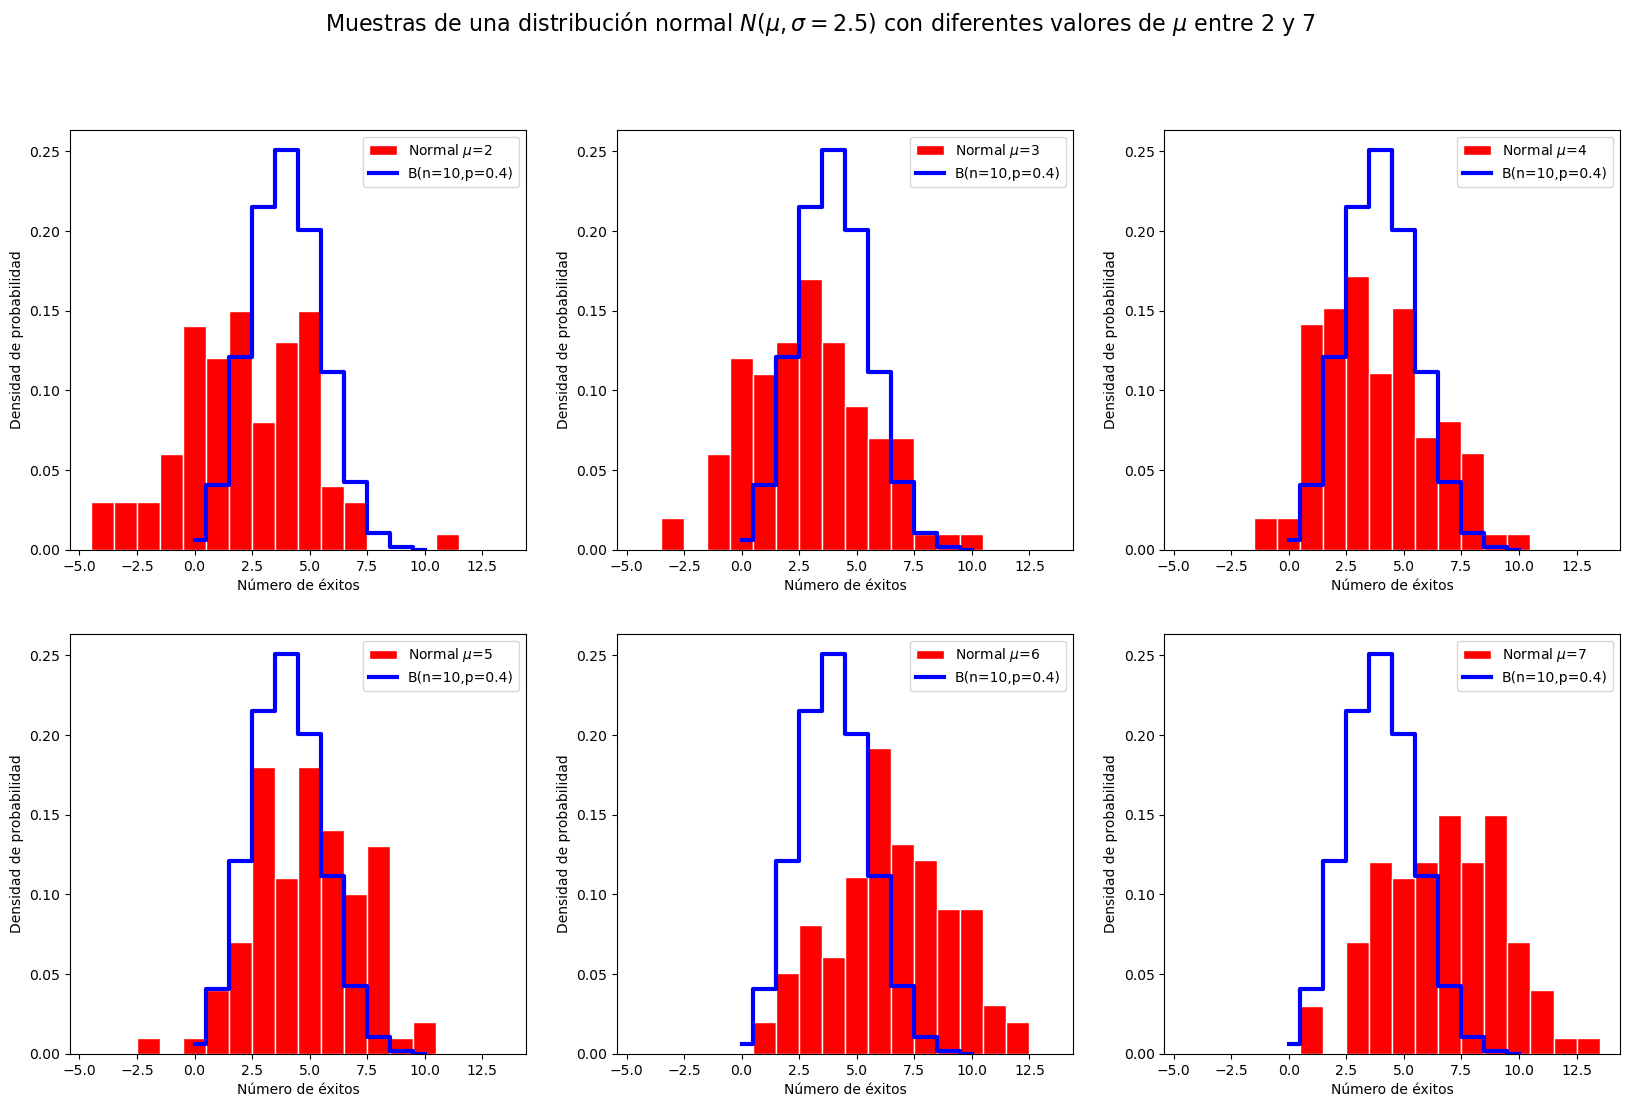

In [6]:
#Simulamos 100 observaciones de la distribucion normal N(mu,sigma)
n = 10  # número de experimentos en la binomial
p = 0.4  # probabilidad de éxito en la binomial
sigma = 2.5  # desviación estándar de la normal
mu_values = [2, 3, 4, 5, 6, 7]  #Lista de diferentes medias μ para las muestras normales a simular.
N = 100  # Tamaño de cada muestra, es decir, el número de observaciones
df = n  # Grados de libertad, que en este caso son nn categorías menos 1 (para el cálculo de chi-cuadrado)

# Función para generar muestras normales
def muestra_normal(mean, sigma=2.5, n=100):
    return np.random.normal(loc=mean, scale=sigma, size=n)

d = []  #  Lista vacía para almacenar las frecuencias observadas en los histogramas.
plt.figure(figsize=(20, 12)) #Establece el tamaño de la figura para mostrar gráficos

for i, mu in enumerate(mu_values, start=1):#se itera sobre los valores de μ en mu_values para simular muestras normales y generar los histogramas correspondientes.
    plt.subplot(2, 3, i)
    

    muestra = muestra_normal(mu) #genera una muestra aleatoria de una distribución normal con media μ y desviación estándar σ=2.5
    
    # Generamos el histograma de la muestra normal.
    histograma, bins = np.histogram(muestra, bins=np.arange(-4.5, 14.5, 1), density=True) #genera las frecuencias observadas de la muestra en diferentes rangos definidos por bins. Luego, se visualiza con plt.hist().
    plt.hist(muestra, bins=np.arange(-4.5, 14.5, 1), color='red', edgecolor='white', density=True, label=f'Normal $\\mu$={mu}')
    
    y = sp.binom.pmf(np.arange(11), n, p)  # calcula la función de probabilidad de la distribución binomial teórica con parámetros n y p.
    plt.step(np.arange(11), y, where='mid', lw=3, c='blue', label=f"B(n={n},p={p:.1f})") #Grafica la distribución binomial teórica.
    plt.xlabel('Número de éxitos')  # Nombre del eje X
    plt.ylabel('Densidad de probabilidad')  # Nombre del eje Y
    plt.legend(loc='best')
    d.append(histograma)   # Almacena las frecuencias observadas para cálculo del chi-cuadrado
plt.suptitle('Muestras de una distribución normal $N(\\mu, \\sigma=2.5)$ con diferentes valores de $\\mu$ entre 2 y 7', fontsize=16)
plt.savefig('histogramas_100muestras.pdf', dpi=300, bbox_inches='tight')

plt.show()

In [7]:
# --- CORRECCIÓN EN EL CÓDIGO DEL INCISO (e) ---

#Calculamos los valores de chi-cuadrado para lo que queriamos.
for l in range(len(mu_values)):
    # Usamos un nombre de variable diferente para no sobrescribir la función
    chi2_calculado = 0
    for i in range(11):
        # chi2 = Σ((observado - esperado)^2 / esperado)
        chi2_calculado += ((d[l][i] - y[i])**2) / y[i] # <--- NOMBRE CAMBIADO

    # Calculamos el valor p
    f = sp.chi2.cdf(chi2_calculado, df=10)  # <--- NOMBRE CAMBIADO
    p = 1 - f  # Valor p

    # Usamos la nueva variable en el print también
    print(f'El chi2 de la distribución normal con media = {mu_values[l]} es: {chi2_calculado:.4f} y el p: {p:.4f}')

El chi2 de la distribución normal con media = 2 es: 30.9335 y el p: 0.0006
El chi2 de la distribución normal con media = 3 es: 53.6482 y el p: 0.0000
El chi2 de la distribución normal con media = 4 es: 63.7640 y el p: 0.0000
El chi2 de la distribución normal con media = 5 es: 208.9953 y el p: 0.0000
El chi2 de la distribución normal con media = 6 es: 359.6102 y el p: 0.0000
El chi2 de la distribución normal con media = 7 es: 146.5983 y el p: 0.0000


In [17]:
#Calculamos los valores de chi-cuadrado para lo que queriamos.
for l in range(len(mu_values)):
    chi2_cal = 0
    for i in range(11):  # Cálculo del estadístico chi-cuadrado para 11 categorías
        # chi2 = Σ((observado - esperado)^2 / esperado)
        chi2_cal += ((d[l][i] - y[i])**2) / y[i]
    
    # Calculamos el valor p
    f = sp.chi2.cdf(chi2_cal, df=10)  # Grados de libertad = 10
    p = 1 - f  # Valor p

    print(f'El chi2 de la distribución normal con media = {mu_values[l]} es: {chi2_cal:.4f} y el p: {p:.4f}')

El chi2 de la distribución normal con media = 2 es: 52.6714 y el p: 0.0000
El chi2 de la distribución normal con media = 3 es: 74.6640 y el p: 0.0000
El chi2 de la distribución normal con media = 4 es: 131.1536 y el p: 0.0000
El chi2 de la distribución normal con media = 5 es: 297.6894 y el p: 0.0000
El chi2 de la distribución normal con media = 6 es: 263.0607 y el p: 0.0000
El chi2 de la distribución normal con media = 7 es: 260.3833 y el p: 0.0000


In [9]:
# --- INCISO (f) ---
print("\n--- Resultados para el Inciso (f) ---")

# 1. Simulación de la muestra según lo solicitado en (f)
n_f = 1000
p_f = 0.4
tamanio_muestra_f = 10000
muestra_f = np.random.binomial(n=n_f, p=p_f, size=tamanio_muestra_f)

print(f"La media de la muestra B({n_f}, {p_f}) generada es: {np.mean(muestra_f):.2f}")

# 2. Definir las categorías del MODELO original B(10, 0.4)
n_modelo = 10
p_modelo = 0.4
# Las categorías que nos interesan son los posibles resultados del modelo teórico: 0, 1, ..., 10.
categorias_modelo = np.arange(n_modelo + 1)

# 3. Calcular las frecuencias OBSERVADAS de la nueva muestra DENTRO de las categorías del modelo.
# Creamos un array de ceros para contar cuántas veces aparecen los valores de 0 a 10 en nuestra nueva muestra.
# Es esperable que estos valores sean 0 o muy cercanos a 0, ya que la muestra se centra en 400.
frecuencias_observadas_f = np.zeros_like(categorias_modelo)
for i in categorias_modelo:
    # Contamos cuántas veces el valor 'i' aparece en la muestra_f
    frecuencias_observadas_f[i] = np.sum(muestra_f == i)

print("Frecuencias observadas para las categorías 0-10:", frecuencias_observadas_f)


# 4. Calcular las frecuencias ESPERADAS según el modelo B(10, 0.4) para una muestra de 10000
frecuencias_esperadas_f = tamanio_muestra_f * sp.binom.pmf(categorias_modelo, n_modelo, p_modelo)

print("Frecuencias esperadas según el modelo B(10, 0.4):", np.round(frecuencias_esperadas_f, 2))


# 5. Calcular el estadístico Chi-cuadrado.
# Nota: Algunas frecuencias esperadas pueden ser muy bajas (<5), lo que viola un supuesto del test.
# En un análisis riguroso, se deberían agrupar categorías. Sin embargo, para este ejercicio,
# la diferencia es tan grande que el resultado será inequívoco de todas formas.
chi2_valor_f = chi2(frecuencias_observadas_f, frecuencias_esperadas_f)
print(f"\nEl valor del estadístico Chi-cuadrado es: {chi2_valor_f:.4f}")


# 6. Calcular los grados de libertad y el valor-p
# Grados de libertad = (número de categorías) - 1
gl_f = len(categorias_modelo) - 1
valor_p_f = 1 - sp.chi2.cdf(chi2_valor_f, gl_f)

print(f"Los grados de libertad son: {gl_f}")
print(f"El valor-p es: {valor_p_f}") # Es muy probable que el resultado sea 0.0


# 7. Conclusión de la prueba de hipótesis
alpha = 0.05
if valor_p_f < alpha:
    print("Se Rechaza la hipótesis nula: los datos de la muestra B(1000, 0.4) no siguen el modelo B(10, 0.4).")
else:
    print("No se rechaza la hipótesis nula.")


--- Resultados para el Inciso (f) ---
La media de la muestra B(1000, 0.4) generada es: 400.24
Frecuencias observadas para las categorías 0-10: [0 0 0 0 0 0 0 0 0 0 0]
Frecuencias esperadas según el modelo B(10, 0.4): [6.04700e+01 4.03110e+02 1.20932e+03 2.14991e+03 2.50823e+03 2.00658e+03
 1.11477e+03 4.24670e+02 1.06170e+02 1.57300e+01 1.05000e+00]

El valor del estadístico Chi-cuadrado es: 10000.0000
Los grados de libertad son: 10
El valor-p es: 0.0
Se Rechaza la hipótesis nula: los datos de la muestra B(1000, 0.4) no siguen el modelo B(10, 0.4).
